In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader as pdr

In [3]:
ir = pdr.get_data_fred('IR', '2018-01-01')
ir

,IR
DATE,
2018-01-01,126.5
2018-02-01,126.8
2018-03-01,126.5
2018-04-01,127.1
2018-05-01,128.2
...,...
2024-01-01,139.4
2024-02-01,139.7
2024-03-01,140.5


In [8]:
ir.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 77 entries, 2018-01-01 to 2024-05-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IR      77 non-null     float64
dtypes: float64(1)
memory usage: 1.2 KB


In [9]:
ir.describe()

,IR
count,77.000000
mean,132.670130
std,8.283974
min,118.200000
25%,125.600000
50%,129.900000
75%,140.100000
max,148.500000


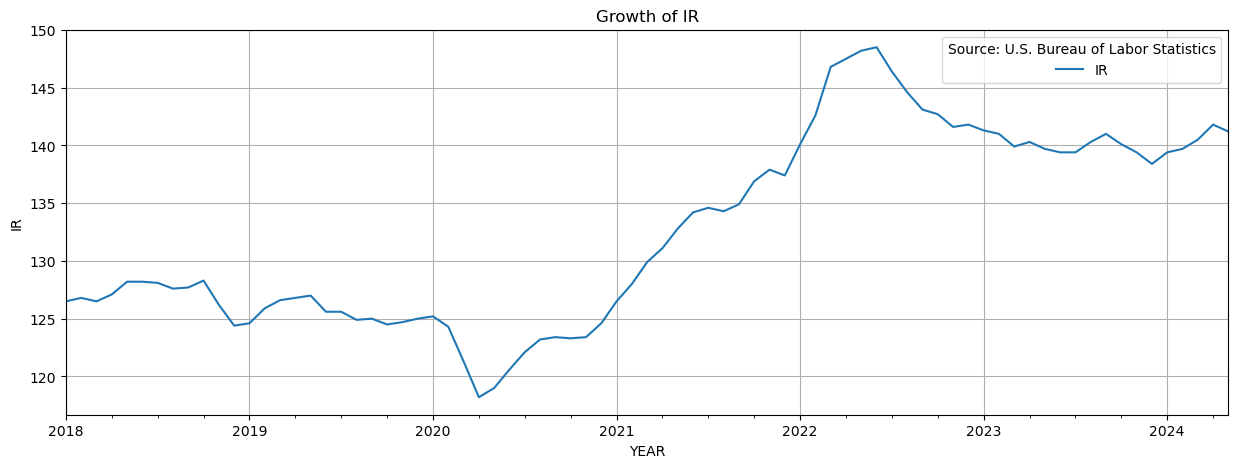

In [11]:
ir.plot(xlabel='YEAR', ylabel='IR',  title='Growth of IR', figsize=(15, 5), grid=True)
plt.legend(title='Source: U.S. Bureau of Labor Statistics')
plt.savefig('ir_plot.png', format='png')
plt.show()

In [15]:
import pandas as pd
import numpy as np

# Sample time series data
dates = pd.date_range(start='2020-01-01', periods=100, freq='D')
data = np.random.rand(100)
df = pd.DataFrame(data, index=dates, columns=['value'])

# Define the rolling window size
window_size = 5

# Compute the rolling mean
df['rolling_mean'] = df['value'].rolling(window=window_size).mean()

# Shift the rolling mean to use it as a forecast
df['forecast'] = df['rolling_mean'].shift(1)

# Drop NaN values resulting from the rolling and shift operations
df.dropna(inplace=True)

print(df)


               value  rolling_mean  forecast
2020-01-06  0.691294      0.561737  0.444355
2020-01-07  0.443997      0.488291  0.561737
2020-01-08  0.125548      0.370114  0.488291
2020-01-09  0.264716      0.378057  0.370114
2020-01-10  0.025807      0.310272  0.378057
...              ...           ...       ...
2020-04-05  0.744447      0.701470  0.705946
2020-04-06  0.169135      0.606508  0.701470
2020-04-07  0.578239      0.615543  0.606508
2020-04-08  0.144538      0.503623  0.615543
2020-04-09  0.899797      0.507231  0.503623

[95 rows x 3 columns]


In [16]:
import pandas as pd
import numpy as np

# Sample time series data
dates = pd.date_range(start='2020-01-01', periods=100, freq='D')
data = np.random.rand(100)
df = pd.DataFrame(data, index=dates, columns=['value'])

# Define the rolling window size
window_size = 5

# Compute the rolling mean
df['rolling_mean'] = df['value'].rolling(window=window_size).median()

# Shift the rolling mean to use it as a forecast
df['forecast'] = df['rolling_mean'].shift(1)

# Drop NaN values resulting from the rolling and shift operations
df.dropna(inplace=True)

print(df)

               value  rolling_mean  forecast
2020-01-06  0.687725      0.431512  0.417039
2020-01-07  0.079038      0.417039  0.431512
2020-01-08  0.460513      0.460513  0.417039
2020-01-09  0.440831      0.460513  0.460513
2020-01-10  0.344844      0.440831  0.460513
...              ...           ...       ...
2020-04-05  0.159150      0.370606  0.410939
2020-04-06  0.555877      0.410939  0.370606
2020-04-07  0.141739      0.410939  0.410939
2020-04-08  0.578642      0.410939  0.410939
2020-04-09  0.980470      0.555877  0.410939

[95 rows x 3 columns]


In [17]:
import pandas as pd
import numpy as np

# Sample monthly time series data
dates = pd.date_range(start='2020-01', periods=10, freq='M')
data = np.random.rand(10)
df = pd.DataFrame(data, index=dates, columns=['value'])

# Define the rolling window size
window_size = 3

# Compute the initial rolling mean
df['rolling_mean'] = df['value'].rolling(window=window_size).mean()

# Shift the rolling mean to use it as a forecast
df['forecast'] = df['rolling_mean'].shift(1)

# Extend the DataFrame to include the next 5 months
future_dates = pd.date_range(start=df.index[-1] + pd.DateOffset(months=1), periods=5, freq='M')
future_df = pd.DataFrame(index=future_dates, columns=df.columns)

# Combine the original and future DataFrames
df = pd.concat([df, future_df])

# Forecast for the next 5 months
for i in range(1, 6):
    # Get the last `window_size` values from the 'value' and 'forecast' columns
    last_values = df['value'].dropna().append(df['forecast'].dropna())[-window_size:]
    
    # Compute the new rolling mean based on the last `window_size` values
    new_forecast = last_values.mean()
    
    # Assign the new forecast to the next period
    df.iloc[-i, df.columns.get_loc('forecast')] = new_forecast

print(df)


AttributeError: 'Series' object has no attribute 'append'